In [19]:
import json
eval_filename = 'KPGroupingbest.json'
with open(eval_filename) as f:
    data = json.load(f)

In [20]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [21]:
#bar
#filename = "d6b85eb627a6f1369811169e8cf42335_d3d3LmV4Y2VsLWRvd25sb2Fkcy5jb20JOTEuMTIxLjMzLjM2.xls-0-0.png"
#filename = "c4c0627d16eb05af88880a92faec6aaa_amFyY2hpdmVzLmNvbQkxOTIuMTg1Ljk4LjE5OA==-5-0.png"
# line
#filename = "fa8527e1883a153f7101c6882c7ba16e_d3d3LmhwYy5nby50aAkxMjIuMTU0LjczLjI2-2-0.png"
#filename="fa485fd5f0f2d78100af17e513423fb5_d3d3Lm1hcGFtYS5nb2IuZXMJMTA0LjgwLjg4Ljk4-13-0.png"
# pie
#filename="fa57abac8df7a30bd2b13719ae20a7de_ZWRnZS5yaXQuZWR1CTEyOS4yMS4xOTguMTYz-0-0.png"
#filename="fa3332da7828168794bf7e6b84ca9537_c3RhdGxpbmtzLm9lY2Rjb2RlLm9yZwk5Mi4yNDMuMjMuMTM3.XLS-0-1.png"
#filename = "fb2ebd179d2715f604e18d2aa0ed08f2_d3d3LnN0YXRpc3RpcXVlcy5kZXZlbG9wcGVtZW50LWR1cmFibGUuZ291di5mcgkzNy4yMzUuODkuMTA3.xls-0-0.png"

(-0.5, 780.5, 474.5, -0.5)

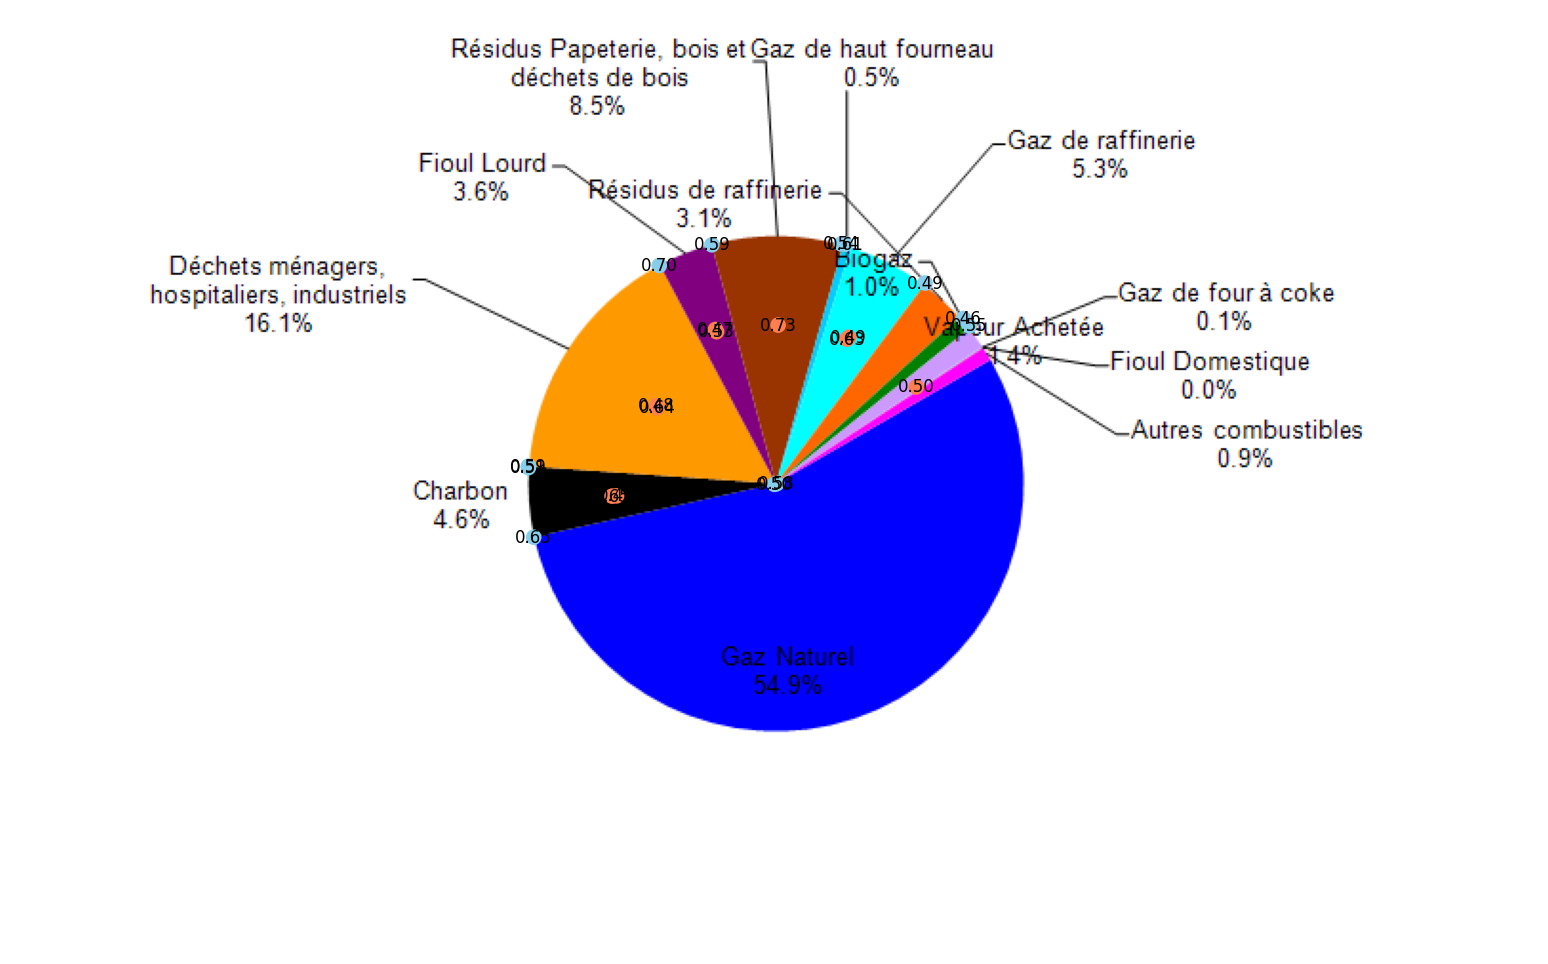

In [22]:
thres = 0.4
img_dir = './'
im = np.array(Image.open(img_dir+filename), dtype=np.uint8)
fig, ax = plt.subplots(1, dpi=300)
ax.imshow(im)
key_point_color = 'skyblue'  # 关键点颜色，天蓝色
center_point_color = 'coral'  # 中心点颜色，珊瑚色
group_line_color = 'lightgrey'
text_color = 'black'
chart_type = None
show_text = True
if 'Group' in eval_filename:
    groups = data[filename][2]
    for group in groups:
        cen_in_group = group[0:2]
        for k in range(1, len(group[:-1])//2):
            key_in_group = group[2*k:2*k+2]
            ax.plot([cen_in_group[0], key_in_group[0]], [cen_in_group[1], key_in_group[1]], color=group_line_color, linewidth=0.8)


if sum(1 for k in data[filename][1]['0'] if k[0] > thres) >= 3:
    chart_type = "vbar_categorical"
    keys = data[filename][0]['0']
    cens = data[filename][1]['0']
    for bbox in keys:
        if bbox[0] > thres:
            circle = patches.Circle((bbox[2], bbox[3]), radius=3, color=key_point_color)
            ax.add_patch(circle)
            if(show_text):
                ax.text(bbox[2], bbox[3]-5, f'{bbox[0]:.2f}', ha='center', va='top', fontsize=4, color=text_color)
    for bbox in cens:
        if bbox[0] > thres:
            circle = patches.Circle((bbox[2], bbox[3]), radius=3, color=center_point_color)
            ax.add_patch(circle)
            if(show_text):
                ax.text(bbox[2], bbox[3]-5, f'{bbox[0]:.2f}', ha='center', va='top', fontsize=4, color=text_color)
elif sum(1 for k in data[filename][1]['2'] if k[0] > thres) >= 3:
    chart_type = "pie"
    keys = data[filename][0]['2']
    cens = data[filename][1]['2']
    for bbox in keys:
        if bbox[0] > thres:
            circle = patches.Circle((bbox[2], bbox[3]), radius=3, color=key_point_color)
            ax.add_patch(circle)
            if(show_text):
                ax.text(bbox[2], bbox[3]-5, f'{bbox[0]:.2f}', ha='center', va='top', fontsize=4, color=text_color)
    for bbox in cens:
        if bbox[0] > thres:
            circle = patches.Circle((bbox[2], bbox[3]), radius=3, color=center_point_color)
            ax.add_patch(circle)
            if(show_text):
                ax.text(bbox[2], bbox[3]-5, f'{bbox[0]:.2f}', ha='center', va='top', fontsize=4, color=text_color)
else:
    chart_type = "line"
    keys = data[filename][0]['1']
    cens = data[filename][1]['1']
    for bbox in keys:
        if bbox[0] > thres:
            circle = patches.Circle((bbox[2], bbox[3]), radius=3, color=key_point_color)
            ax.add_patch(circle)
            if(show_text):
                ax.text(bbox[2], bbox[3]-5, f'{bbox[0]:.2f}', ha='center', va='top', fontsize=4, color=text_color)
    for bbox in cens:
        if bbox[0] > thres:
            circle = patches.Circle((bbox[2], bbox[3]), radius=3, color=center_point_color)
            ax.add_patch(circle)
            if(show_text):
                ax.text(bbox[2], bbox[3]-5, f'{bbox[0]:.2f}', ha='center', va='top', fontsize=4, color=text_color)
plt.axis('off') # Hide axes

In [23]:
chart_type

'pie'

In [24]:
plt.show()